In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler # for normalizing numeric data with ration
from prophet import Prophet

In [56]:
worldmeter = pd.read_csv(r"C:\Users\Emanuel\Desktop\Omolola\python class\3mtt\capstone project\worldometer_data.csv")

In [3]:
usa_country = pd.read_csv(r"C:\Users\Emanuel\Desktop\Omolola\python class\3mtt\capstone project\usa_county_wise.csv")

In [4]:
covid_19 = pd.read_csv(r"C:\Users\Emanuel\Desktop\Omolola\python class\3mtt\capstone project\covid_19_clean_complete.csv")

In [60]:
worldmeter # I called the worldmeter dataset

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [6]:
worldmeter = worldmeter.drop(columns=["Continent", "NewCases", "NewDeaths", "NewRecovered"])

# I dropped completely three columns that have NaN values throughout

In [7]:
worldmeter.head(3)

,Country/Region,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia


In [8]:
worldmeter.isnull().sum() # I checked the number of missing values to know what to fill and what to drop

Country/Region       0
Population           1
TotalCases           0
TotalDeaths         21
TotalRecovered       4
ActiveCases          4
Serious,Critical    87
Tot Cases/1M pop     1
Deaths/1M pop       22
TotalTests          18
Tests/1M pop        18
WHO Region          25
dtype: int64

In [9]:
worldmeter["Serious,Critical"] = worldmeter["Serious,Critical"].fillna(worldmeter["Serious,Critical"].median())
worldmeter["TotalDeaths"] = worldmeter["TotalDeaths"].fillna(worldmeter["TotalDeaths"].median())
worldmeter["Deaths/1M pop"] = worldmeter["Deaths/1M pop"].fillna(worldmeter["Deaths/1M pop"].median())
worldmeter["TotalTests"] = worldmeter["TotalTests"].fillna(worldmeter["TotalTests"].median())
worldmeter["Tests/1M pop"] = worldmeter["Tests/1M pop"].fillna(worldmeter["Tests/1M pop"].median())
worldmeter["WHO Region"] = worldmeter["WHO Region"].fillna(worldmeter["WHO Region"].mode())

# I chose to fillna rather than drop the missing values because I can't lose 87 dataset out of 209 dataset

In [10]:
worldmeter.tail(3)

,Country/Region,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
206,Falkland Islands,3489.0,13,113.0,13.0,0.0,27.5,3726.0,29.0,1816.0,520493.0,NaN
207,Vatican City,801.0,12,113.0,12.0,0.0,27.5,14981.0,29.0,135702.0,32585.0,Europe
208,Western Sahara,598682.0,10,1.0,8.0,1.0,27.5,17.0,2.0,135702.0,32585.0,Africa


In [11]:
worldmeter = worldmeter.dropna() # Here, I dropped the remaining missing values because the effect isn't much

In [12]:
worldmeter.head(3)

,Country/Region,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia


In [13]:
worldmeter.isnull().sum() # checked to see if there still missing values

Country/Region      0
Population          0
TotalCases          0
TotalDeaths         0
TotalRecovered      0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64

In [14]:
worldmeter.info() # I derived the dataset information so i can make necessary adjument

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 208
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    180 non-null    object 
 1   Population        180 non-null    float64
 2   TotalCases        180 non-null    int64  
 3   TotalDeaths       180 non-null    float64
 4   TotalRecovered    180 non-null    float64
 5   ActiveCases       180 non-null    float64
 6   Serious,Critical  180 non-null    float64
 7   Tot Cases/1M pop  180 non-null    float64
 8   Deaths/1M pop     180 non-null    float64
 9   TotalTests        180 non-null    float64
 10  Tests/1M pop      180 non-null    float64
 11  WHO Region        180 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 18.3+ KB


In [15]:
worldmeter = worldmeter.rename(columns={'Tot Cases/1M pop': 'Total Cases Per Million'})
worldmeter = worldmeter.rename(columns={'Tests/1M pop': 'Test Cases Per Million'})
worldmeter = worldmeter.rename(columns={'Deaths/1M pop': 'Deaths Cases Per Million'})
worldmeter = worldmeter.rename(columns={'Country/Region': 'Country'})
worldmeter = worldmeter.rename(columns={'Serious,Critical': 'SeriousCritical'})

# Here, I renamed some of the columns for more clarification

In [16]:
worldmeter.tail(3)

,Country,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,Total Cases Per Million,Deaths Cases Per Million,TotalTests,Test Cases Per Million,WHO Region
203,Greenland,56780.0,14,113.0,14.0,0.0,27.5,247.0,29.0,5977.0,105266.0,Europe
207,Vatican City,801.0,12,113.0,12.0,0.0,27.5,14981.0,29.0,135702.0,32585.0,Europe
208,Western Sahara,598682.0,10,1.0,8.0,1.0,27.5,17.0,2.0,135702.0,32585.0,Africa


In [17]:
numeric_cols = worldmeter.select_dtypes(include=['float64', 'int']).columns  
numeric_cols 

Index(['Population', 'TotalCases', 'TotalDeaths', 'TotalRecovered',
       'ActiveCases', 'SeriousCritical', 'Total Cases Per Million',
       'Deaths Cases Per Million', 'TotalTests', 'Test Cases Per Million'],
      dtype='object')

In [18]:
numeric_columns = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 
                   'ActiveCases', 'SeriousCritical', 
                   'Total Cases Per Million', 'Deaths Cases Per Million', 
                   'TotalTests', 'Test Cases Per Million']

scaler = MinMaxScaler()
worldmeter[numeric_columns] = scaler.fit_transform(worldmeter[numeric_columns])

In [19]:
worldmeter

,Country,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,Total Cases Per Million,Deaths Cases Per Million,TotalTests,Test Cases Per Million,WHO Region
0,USA,3.311981e+08,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,0.380546,0.397376,1.000000,0.191540,Americas
1,Brazil,2.127107e+08,5.797802e-01,0.605904,0.794692,3.363962e-01,0.454605,0.343521,0.374758,0.209157,0.062376,Americas
2,India,1.381345e+09,4.024903e-01,0.255751,0.534559,2.644852e-01,0.488822,0.036649,0.024170,0.350798,0.016107,South-EastAsia
3,Russia,1.459409e+08,1.732621e-01,0.089710,0.262491,7.891588e-02,0.125663,0.149578,0.080716,0.470653,0.204585,Europe
4,South Africa,5.938157e+07,1.069467e-01,0.058985,0.150314,6.161450e-02,0.029407,0.226960,0.130800,0.049885,0.053292,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...
201,Dominica,7.200400e+04,1.589772e-06,0.000688,0.000004,0.000000e+00,0.001448,0.006188,0.023362,0.000014,0.014020,Americas
202,Saint Kitts and Nevis,5.323700e+04,1.391050e-06,0.000688,0.000003,4.361656e-07,0.001448,0.007916,0.023362,0.000016,0.021624,Americas
203,Greenland,5.678000e+04,7.948859e-07,0.000688,0.000002,0.000000e+00,0.001448,0.006112,0.023362,0.000093,0.105761,Europe
207,Vatican City,8.010000e+02,3.974429e-07,0.000688,0.000002,0.000000e+00,0.001448,0.375210,0.023362,0.002147,0.032736,Europe


# Feature Engineering

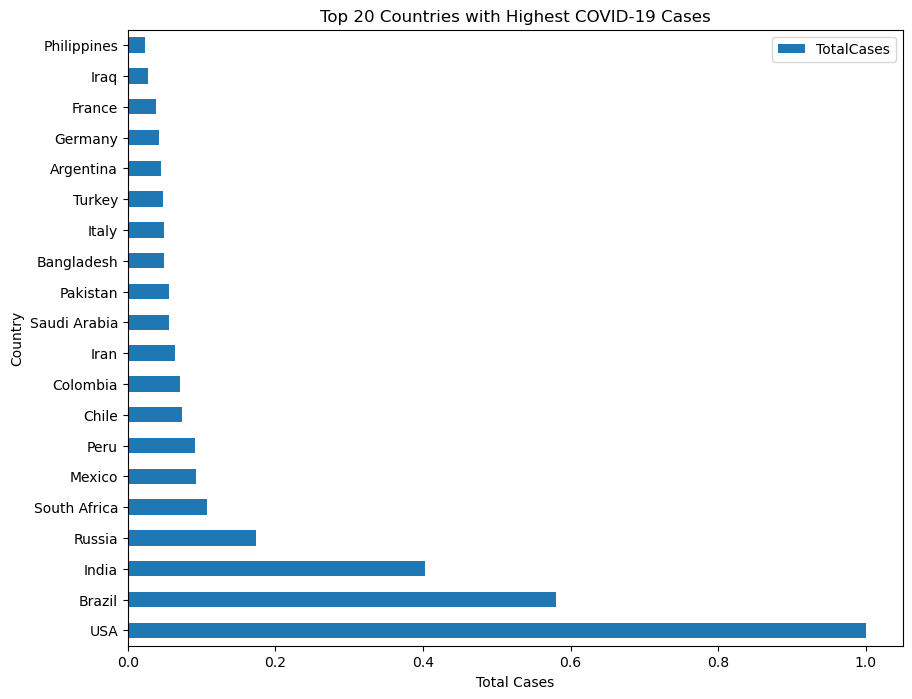

In [21]:
top_20_countries = worldmeter.nlargest(20, 'TotalCases')

# Plot horizontal bar chart
top_20_countries.plot(x='Country', y='TotalCases', kind='barh', figsize=(10, 8))
plt.title('Top 20 Countries with Highest COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

# To predict the spread of the virus, I decided to check out the top 20 countries with the highest virus rate, 
# The chart below shows the USA has the highest rate of COVID-19 cases
# South Africa, Mexico, Peru indicate mid-range values
# while many countries, such as Germany, Argentina, and Turkey lower values.


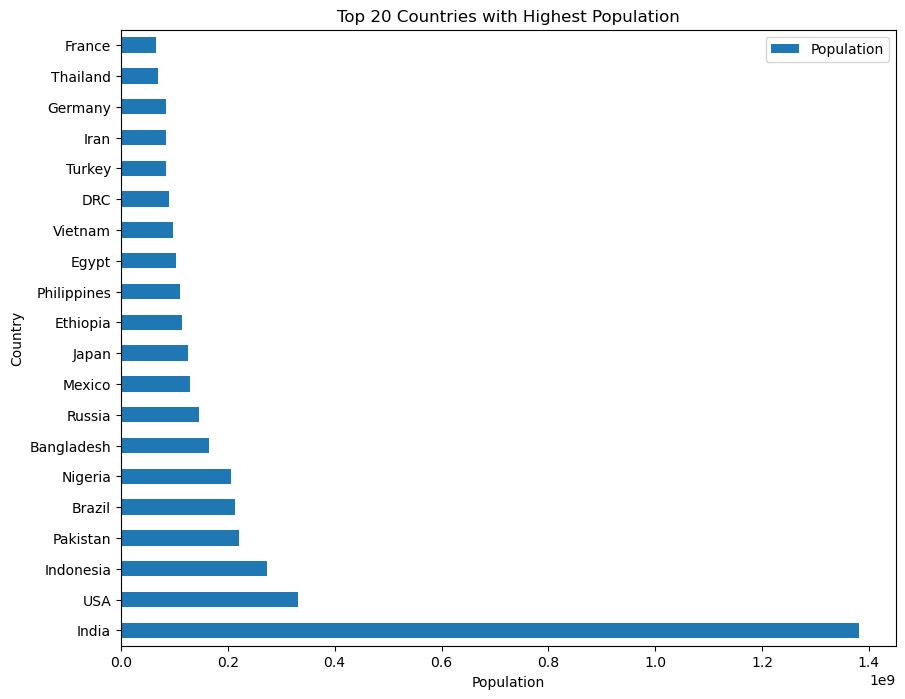

'The chart below shows that population size is a major factor contributing to the increase in COVID-19 cases in many countries.\nHowever, it’s clear from the chart that there are other reasons for the high spread of the virus beyond population size.\nFor example, the first chart shows the USA with the highest number of cases, while India ranks third. \nOn the population chart, however, India has the largest population, followed by the USA. \nDespite this, the USA has more cases than India. \nThis suggests that other factors, apart from population size,\nplayed a significant role in the spread of the virus in different countries.'

In [22]:
top_20_countries = worldmeter.nlargest(20, 'Population')

# Plot horizontal bar chart
top_20_countries.plot(x='Country', y='Population', kind='barh', figsize=(10, 8))
plt.title('Top 20 Countries with Highest Population')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

# At this point, I decided to check if the population size of a country plays a role in determining the number of COVID-19 cases in various countries.
"""The chart below shows that population size is a major factor contributing to the increase in COVID-19 cases in many countries.
However, it’s clear from the chart that there are other reasons for the high spread of the virus beyond population size.
For example, the first chart shows the USA with the highest number of cases, while India ranks third. 
On the population chart, however, India has the largest population, followed by the USA. 
Despite this, the USA has more cases than India. 
This suggests that other factors, apart from population size,
played a significant role in the spread of the virus in different countries."""

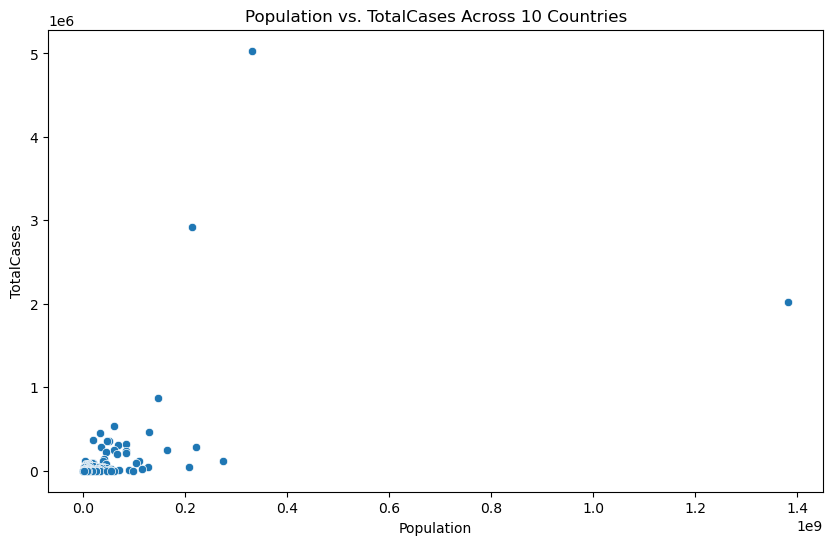

' the chart below reviews an outlier outliers where a country with a smaller population has a disproportionately high number of cases,\nindicating potential factors such as healthcare systems, testing rates, or other socio-economic factors. '

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=worldmeter['Population'], y=worldmeter['TotalCases'])
plt.title('Population vs. TotalCases Across 10 Countries')
plt.xlabel('Population')
plt.ylabel('TotalCases')
plt.show()
""" the chart below reviews an outliers where a country with a smaller population has a disproportionately high number of cases,
indicating potential factors such as healthcare systems, testing rates, or other socio-economic factors. """

In [23]:
worldmeter['MortalityRatio'] = worldmeter['TotalDeaths'] / worldmeter['TotalCases']

In [24]:
worldmeter['RecoveryRate'] = worldmeter['TotalRecovered'] / worldmeter['TotalCases']

In [25]:
worldmeter['CasesPerPopulation'] = worldmeter['TotalCases'] / worldmeter['Population']

In [26]:
scaler = MinMaxScaler()
worldmeter[numeric_cols] = scaler.fit_transform(worldmeter[numeric_cols])

In [27]:
worldmeter.dropna(inplace=True)

In [28]:
worldmeter

,Country,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,Total Cases Per Million,Deaths Cases Per Million,TotalTests,Test Cases Per Million,WHO Region,MortalityRatio,RecoveryRate,CasesPerPopulation
0,USA,0.239765,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,0.380546,0.397376,1.000000,0.191540,Americas,1.000000,1.000000,3.019341e-09
1,Brazil,0.153988,5.797802e-01,0.605904,0.794692,3.363962e-01,0.454605,0.343521,0.374758,0.209157,0.062376,Americas,1.045058,1.370679,2.725675e-09
2,India,1.000000,4.024903e-01,0.255751,0.534559,2.644852e-01,0.488822,0.036649,0.024170,0.350798,0.016107,South-EastAsia,0.635421,1.328128,2.913756e-10
3,Russia,0.105651,1.732621e-01,0.089710,0.262491,7.891588e-02,0.125663,0.149578,0.080716,0.470653,0.204585,Europe,0.517769,1.514992,1.187207e-09
4,South Africa,0.042988,1.069467e-01,0.058985,0.150314,6.161450e-02,0.029407,0.226960,0.130800,0.049885,0.053292,Africa,0.551540,1.405503,1.801009e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Laos,0.005274,1.987215e-06,0.000688,0.000004,4.361656e-07,0.001448,0.000000,0.023362,0.000463,0.004047,WesternPacific,346.187065,2.148280,2.727536e-13
201,Dominica,0.000052,1.589772e-06,0.000688,0.000004,0.000000e+00,0.001448,0.006188,0.023362,0.000014,0.014020,Americas,432.733832,2.441227,2.207894e-11
202,Saint Kitts and Nevis,0.000038,1.391050e-06,0.000688,0.000003,4.361656e-07,0.001448,0.007916,0.023362,0.000016,0.021624,Americas,494.552950,2.231979,2.612939e-11
203,Greenland,0.000041,7.948859e-07,0.000688,0.000002,0.000000e+00,0.001448,0.006112,0.023362,0.000093,0.105761,Europe,865.467663,2.929472,1.399940e-11


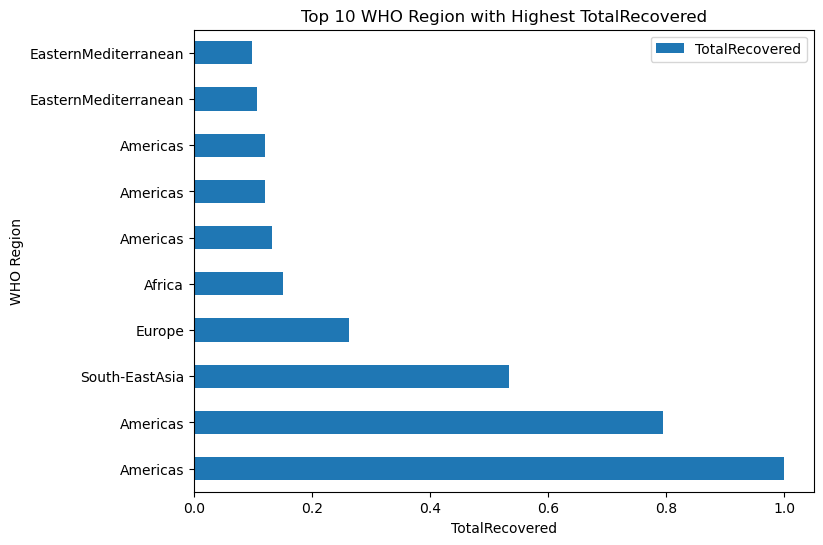

' The chart reviews Africa has the highest recovery rate. this can be due to low cases is this region.'

In [29]:
top_10_TotalRecovered = worldmeter.nlargest(10, 'TotalRecovered')

# Plot horizontal bar chart
top_10_TotalRecovered.plot(x='WHO Region', y='TotalRecovered', kind='barh', figsize=(8, 6))
plt.title('Top 10 WHO Region with Highest TotalRecovered')
plt.xlabel('TotalRecovered')
plt.ylabel('WHO Region')
plt.show()
""" The chart reviews Africa has the highest recovery rate. this can be due to low cases is this region.""" 

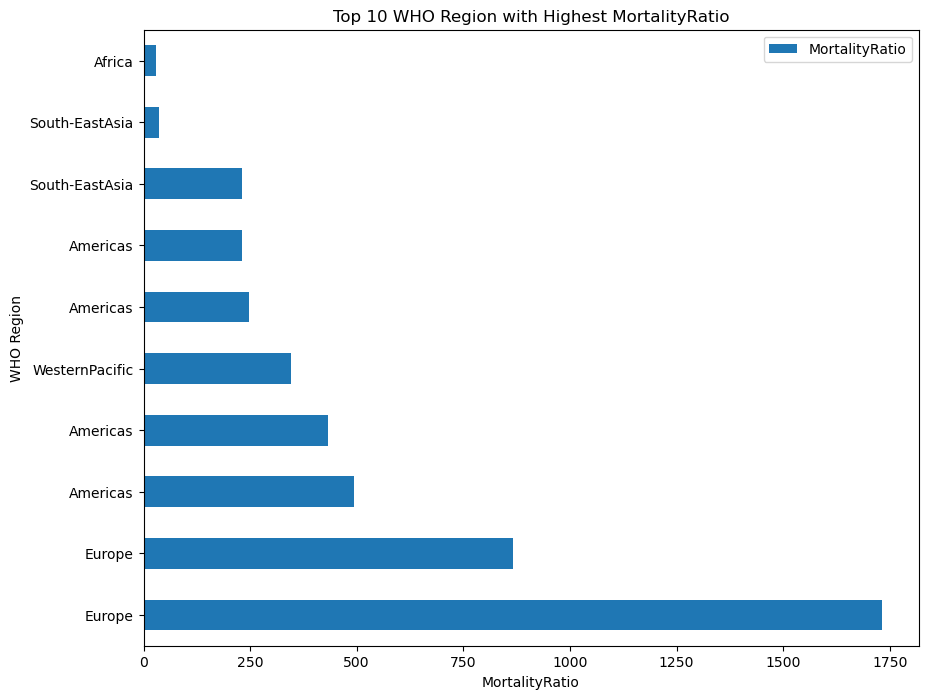

" I was interested in knowing the mortality rate per continent in order to view the impact of the virus \nin the region based on the high spread of the virus in some countries. \nHowever, I didn't like the fact that my graph became clustered with the Americas."

In [30]:
top_10_MortalityRatio = worldmeter.nlargest(10, 'MortalityRatio')

# Plot horizontal bar chart
top_10_MortalityRatio.plot(x='WHO Region', y='MortalityRatio', kind='barh', figsize=(10, 8))
plt.title('Top 10 WHO Region with Highest MortalityRatio')
plt.xlabel('MortalityRatio')
plt.ylabel('WHO Region')
plt.show()

""" I was interested in knowing the mortality rate per continent in order to view the impact of the virus 
in the region based on the high spread of the virus in some countries. 
However, I didn't like the fact that my graph became clustered with the Americas."""

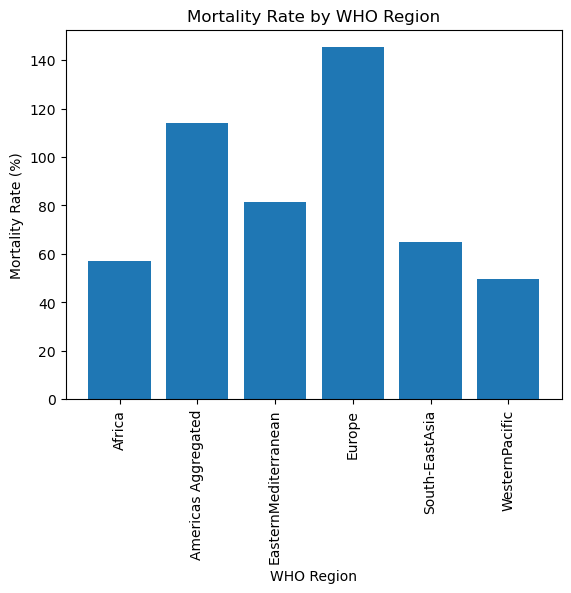

'At this point, I aggregated all entries for the Americas into a single group to analyze the overall impact of the virus. \nAfter calculating the mortality rate (%) for each region, it became evident that the Americas and Europe are the most deeply impacted regions, \nexhibiting alarmingly high death rates. This finding underscores an urgent need to improve health resource allocation in these regions. \nThe high mortality rates signal severe strain on healthcare systems and demand immediate action to address gaps in medical infrastructure,\ntreatment accessibility, and preventive measures..'

In [31]:
worldmeter.loc[worldmeter['WHO Region'] == "Americas", 'WHO Region'] = "Americas Aggregated"

worldmeter_grouped = worldmeter.groupby("WHO Region", as_index=False).sum()

worldmeter_grouped['Mortality Rate (%)'] = (worldmeter_grouped['TotalDeaths'] / worldmeter_grouped['TotalCases']) * 100

plt.bar(worldmeter_grouped['WHO Region'], worldmeter_grouped['Mortality Rate (%)'])
plt.title("Mortality Rate by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Mortality Rate (%)")
plt.xticks(rotation=90)
plt.show()
"""At this point, I aggregated all entries for the Americas into a single group to analyze the overall impact of the virus. 
After calculating the mortality rate (%) for each region, it became evident that the Americas and Europe are the most deeply impacted regions, 
exhibiting alarmingly high death rates. This finding underscores an urgent need to improve health resource allocation in these regions. 
The high mortality rates signal severe strain on healthcare systems and demand immediate action to address gaps in medical infrastructure,
treatment accessibility, and preventive measures.."""

In [32]:
covid_19

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [33]:
covid_19.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [34]:
covid_19 = covid_19.drop(columns=["Province/State"])

In [35]:
covid_19 = covid_19.rename(columns={'Country/Region': 'Country'})

In [36]:
covid_19

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [37]:
covid_19['Date'].dtype

dtype('O')

In [38]:
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     49068 non-null  object 
 1   Lat         49068 non-null  float64
 2   Long        49068 non-null  float64
 3   Date        49068 non-null  object 
 4   Confirmed   49068 non-null  int64  
 5   Deaths      49068 non-null  int64  
 6   Recovered   49068 non-null  int64  
 7   Active      49068 non-null  int64  
 8   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


In [39]:
covid_19['Date'].head()

0    2020-01-22
1    2020-01-22
2    2020-01-22
3    2020-01-22
4    2020-01-22
Name: Date, dtype: object

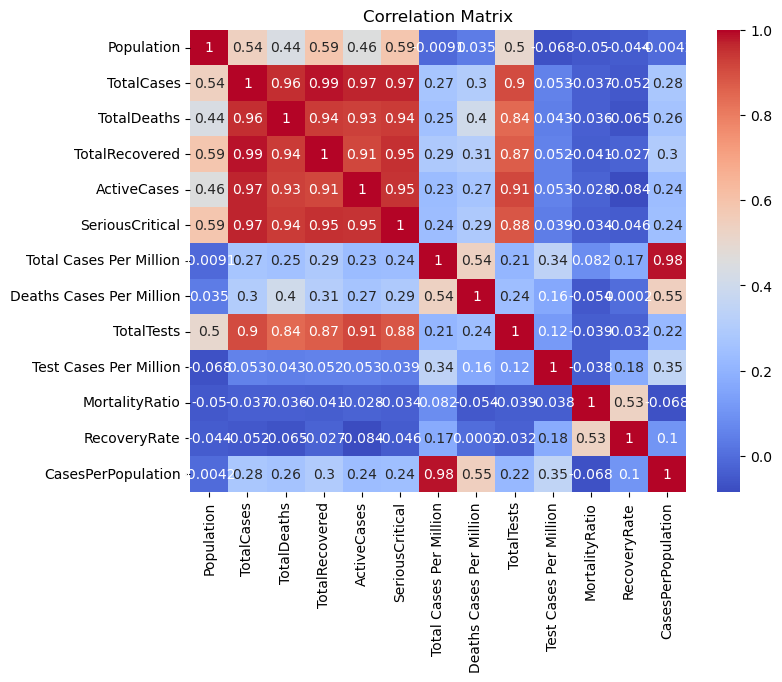

' The mapping below shows strong positive relationships among TotalCases, TotalDeaths, ActiveCases, TotalRecovered, and SeriousCritical. \nThese variables are highly correlated, with correlation values close to 1.\nThis means that as the total number of cases increases, the number of deaths, recoveries, active cases, and serious/critical cases also increases.\nAdditionally, the high correlation (~0.98) indicates that the number of cases is strongly proportional to the population size.\nThe chart also reveals a weak negative correlation between population and the mortality ratio (~-0.05). \nThis suggests that population size does not directly affect mortality rates. \nThis was also observed in the bar chart, where the USA recorded the highest number of cases, whereas India had the highest population.\nThe mapping also showed that the mortality ratio does not correlate with many variables.\nThis may suggest that other factors, such as healthcare quality and age distribution, might play a

In [40]:
numerical_worldmeter = worldmeter.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_worldmeter.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
""" The mapping below shows strong positive relationships among TotalCases, TotalDeaths, ActiveCases, TotalRecovered, and SeriousCritical. 
These variables are highly correlated, with correlation values close to 1.
This means that as the total number of cases increases, the number of deaths, recoveries, active cases, and serious/critical cases also increases.
Additionally, the high correlation (~0.98) indicates that the number of cases is strongly proportional to the population size.
The chart also reveals a weak negative correlation between population and the mortality ratio (~-0.05). 
This suggests that population size does not directly affect mortality rates. 
This was also observed in the bar chart, where the USA recorded the highest number of cases, whereas India had the highest population.
The mapping also showed that the mortality ratio does not correlate with many variables.
This may suggest that other factors, such as healthcare quality and age distribution, might play a more significant role in mortality.
Furthermore, other factors such as Total Cases Per Million, Deaths Cases Per Million, 
and Test Cases Per Million show no strong relationship with TotalCases, TotalDeaths, TotalRecovered, ActiveCases, and SeriousCritical.
"""

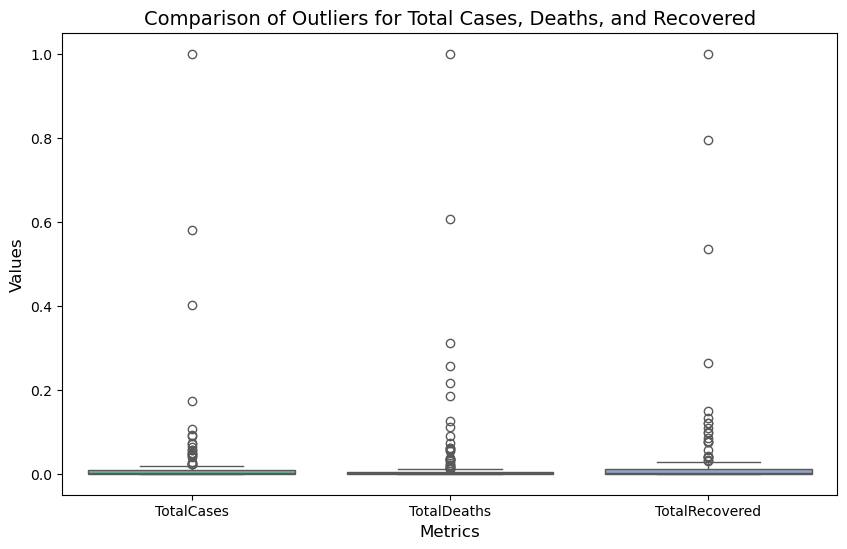

' The outliers show some countries with an unusually high number of COVID-19 cases compared to most other countries. \nThis result was also observed in the first bar chart, where the USA displayed an unusually high number of COVID-19 cases. \nEurope, on the other hand, shows a high mortality rate, whereas Africa shows a high recovery ratio.\nThe outliers could be due to factors such as increased population in some areas, low total cases in others, \nand strong healthcare systems in certain regions.'

In [41]:
worldmeter = worldmeter[['TotalCases', 'TotalDeaths', 'TotalRecovered']]

plt.figure(figsize=(10, 6))
sns.boxplot(data=worldmeter, palette='Set2')

plt.title('Comparison of Outliers for Total Cases, Deaths, and Recovered', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)

plt.show()
""" The outliers show some countries with an unusually high number of COVID-19 cases compared to most other countries. 
This result was also observed in the first bar chart, where the USA displayed an unusually high number of COVID-19 cases. 
Europe, on the other hand, shows a high mortality rate, whereas Africa shows a high recovery ratio.
The outliers could be due to factors such as increased population in some areas, low total cases in others, 
and strong healthcare systems in certain regions."""

In [42]:
covid_19['Date'] = pd.to_datetime(covid_19['Date'])
time_series_data = covid_19.groupby('Date')['Active'].sum().reset_index()

20:32:40 - cmdstanpy - INFO - Chain [1] start processing
20:32:41 - cmdstanpy - INFO - Chain [1] done processing


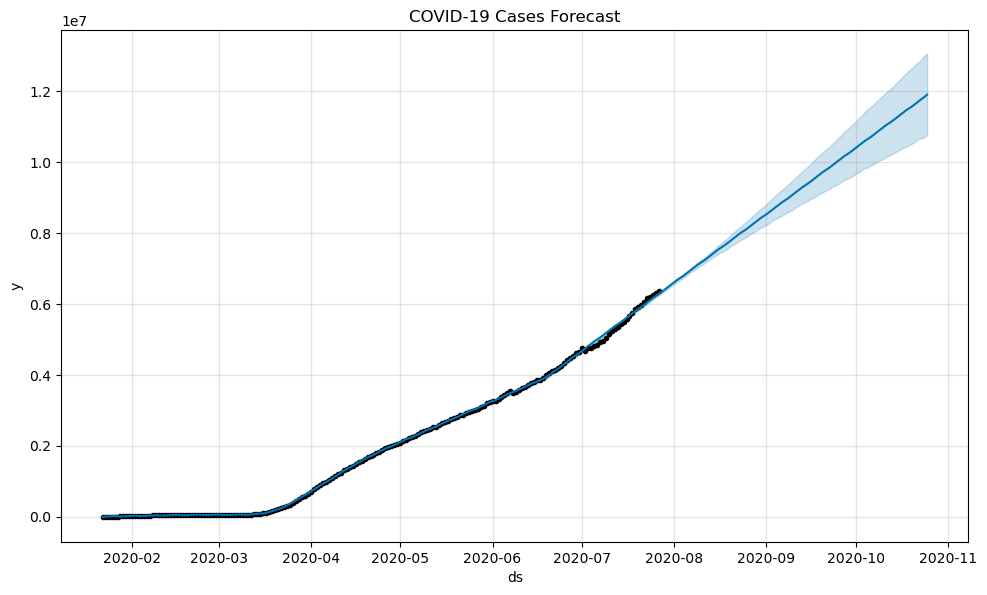

' This prediction was based on observations carried out over the last 7 months and is meant to forecast what will likely\nhappen in the next 3 months. It shows an increase in COVID-19 cases during this period.\nThe shaded area of the chart represents uncertainty in the predicted increase of COVID-19 cases, \ninfluenced by factors such as improvements in the health sector, the availability of vaccines, and virus mutations. '

In [43]:
time_series_data.rename(columns={'Date': 'ds', 'Active': 'y'}, inplace=True)
model = Prophet()
model.fit(time_series_data)
future = model.make_future_dataframe(periods=90)  # Forecast for 3 months
forecast = model.predict(future)
model.plot(forecast)
plt.title('COVID-19 Cases Forecast')
plt.show()
""" This prediction was based on observations carried out over the last 7 months and is meant to forecast what will likely
happen in the next 3 months. It shows an increase in COVID-19 cases during this period.
The shaded area of the chart represents uncertainty in the predicted increase of COVID-19 cases, 
influenced by factors such as improvements in the health sector, the availability of vaccines, and virus mutations. """

In [1]:
covid_19 = covid_19[['Date', 'Active']]
covid_19.rename(columns={'Date': 'ds', 'Active': 'y'}, inplace=True)
covid_19.head()

""" at this point, I select the relevant columns to check for accuracy in the above prediction. """


NameError: name 'covid_19' is not defined

In [45]:
merged_data = pd.merge(covid_19[['ds', 'y']], forecast[['ds', 'yhat']], on='ds', how='inner')
y_true = merged_data['y']
y_pred = merged_data['yhat']
dates = merged_data['ds']
""" merged the data was neccessay due to the inconsistency in the dataset. """

' merged the data was neccessay due to the inconsistency in the dataset. '

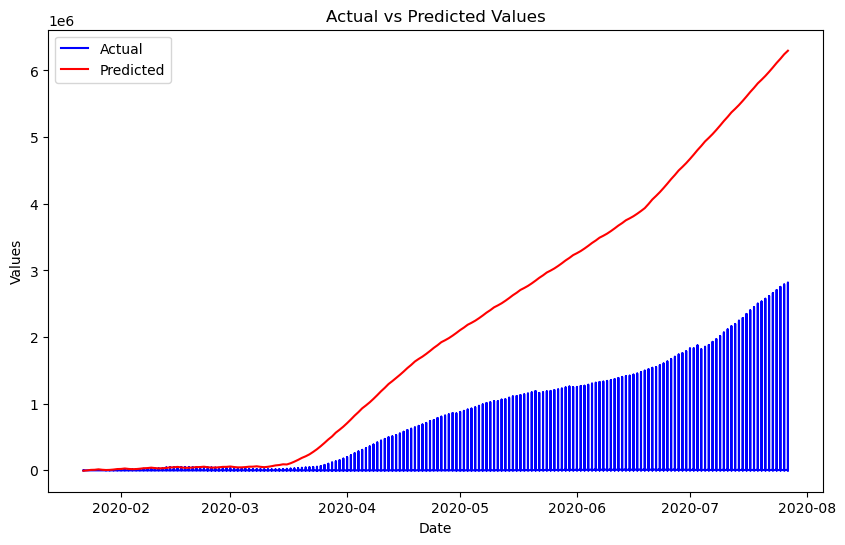

' the model performance accuracy also predicts that COVID-19 cases will continue to rise,\nas seen from the upward-sloping forecast line. The blue shaded area represents the range of possible cases in the future.'

In [46]:
min_len = min(len(y_true), len(y_pred))
y_true = y_true[:min_len]
y_pred = y_pred[:min_len]
dates = covid_19['ds'][:min_len]
plt.figure(figsize=(10, 6))
plt.plot(dates, y_true, label='Actual', color='blue')
plt.plot(dates, y_pred, label='Predicted', color='red')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()
""" the model performance accuracy also predicts that COVID-19 cases will continue to rise,
as seen from the upward-sloping forecast line. The blue shaded area represents the range of possible cases in the future."""

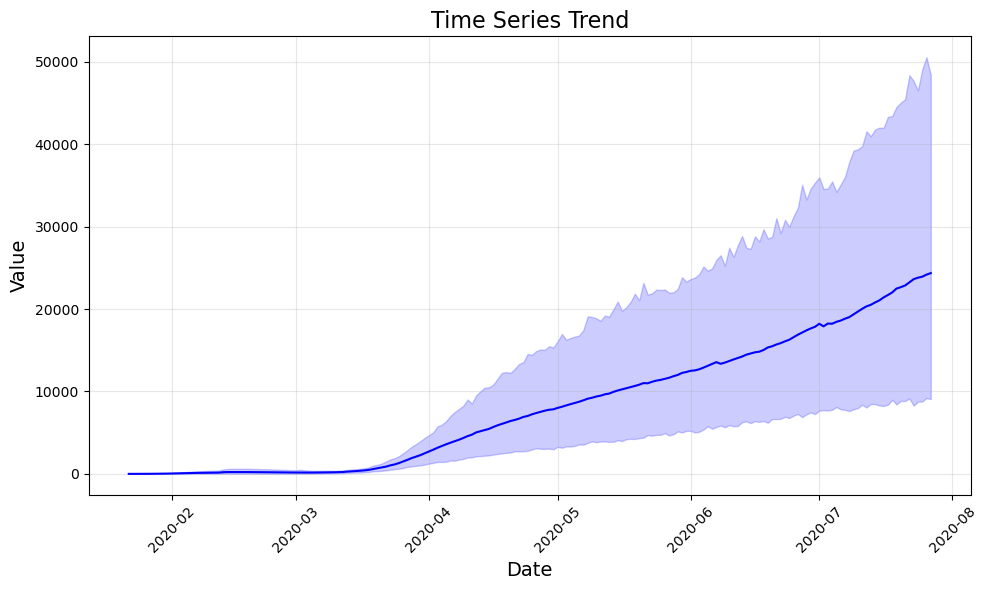

In [52]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=covid_19, x='ds', y='y', color='blue')
plt.title('Time Series Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# In conclusion

In [76]:
""" This report provides a detailed analysis of the relationship between population size and the number of COVID-19 cases across 20 countries. 
I explore various stages of the data analysis pipeline, from data preparation and exploratory data analysis (EDA)
to model development, evaluation, and key insights. The objective is to determine the COVID-19 trend and whether an increase in population
correlates with an increase in COVID-19 cases.

the source of the dataset was obtained fron Kaggle. I downloaded a zip file and from the zip file, I got two datasets(worldmeter, covid 19) 
which I used for the analysis.the worldmeter dataset comprises total cases, active cases, population, coutries, region 
and so on. i selected 20, and 10 countries for this study the contries are: USA, India, Brazil, Russia, Turkey, France, Italy,
Germany, UK, and Spain.

Before starting the analysis, the data underwent some key steps of cleaning and preparation:
Handling Missing Value to deal with incomplete dat. this was important to addressed and ensure the accuracy of the analysis.
i also ensure  Consistency Data from multiple sources was standardized to avoid discrepancies, ensuring a uniform structure for analysis.

This report provides an analysis of COVID-19 cases across different countries, 
with a focus on the relationship between key variables such as total cases, deaths, recoveries, and active cases.
The goal of this analysis is to offer insights into the COVID-19 trend and future projections. Using machine learning models,
the forecast was based on the number of COVID-19 cases for the next 6 months. the analysis made use of worldmeter dataset to determine
the country with high COVID-19 cases. I also use a bar chart with a scatter plot to estimate whether the increase in population
leads to an increase in the number of cases. the report has no strong correlation between population and total covid 19 cases and it reviews an 
outlier. i also use mapping. the mapping shows strong positive relationships among TotalCases, TotalDeaths, ActiveCases, TotalRecovered, and SeriousCritical. 
These variables are highly correlated, with correlation values close to 1.
This means that as the total number of cases increases, the number of deaths, recoveries, active cases, and serious/critical cases also increases.
Additionally, the high correlation (~0.98) indicates that the number of cases is strongly proportional to the population size.
my prediction was based on observations carried out over the last 7 months and is meant to forecast what will likely
happen in the next 6 months. It shows an increase in COVID-19 cases during this period.
: The regression results showed a positive relationship, confirming that as population size increases, 
the expected COVID-19 cases also increase. The R-squared value from the model was high, indicating that the 
population size explains a significant proportion of the variation in COVID-19 cases."""

' This report provides a detailed analysis of the relationship between population size and the number of COVID-19 cases across 20 countries. \nI explore various stages of the data analysis pipeline, from data preparation and exploratory data analysis (EDA)\nto model development, evaluation, and key insights. The objective is to determine the COVID-19 trend and whether an increase in population\ncorrelates with an increase in COVID-19 cases.\n\nthe source of the dataset was obtained fron Kaggle. I downloaded a zip file and from the zip file, I got two datasets(worldmeter, covid 19) \nwhich I used for the analysis.the worldmeter dataset comprises total cases, active cases, population, coutries, region \nand so on. i selected 20, and 10 countries for this study the contries are: USA, India, Brazil, Russia, Turkey, France, Italy,\nGermany, UK, and Spain.\n\nBefore starting the analysis, the data underwent some key steps of cleaning and preparation:\nHandling Missing Value to deal with inco